# Predictiing Accident Injury Severity with ML Algorithms
sklearn: https://scikit-learn.org/stable/

1. Goal
    - Predicting accident injuries severity. 
    - predict the safest/most dangerous times to travel ( not finished yet).
2. Dataset [https://www.kaggle.com/bluehorseshoe/uk-2016-road-safety-data?select=Veh.csv]
    - Joining different data files
3. Data Cleanning
    1. renaming column's name
    2. converting column's name into lower case for better readability
4. Data Exploration & Preparation
    1. Data Statistics
    2. Messy Datasets
        - checking the nulls and NaN
        - dropping if neccessary (depending on data size as the main aim is not to lose the data info)
        - dropping all negative labels such as -1 which means information or there is no reocrds for the accident
    3. Remove Columns That Have A Low Variance
    4. Identify and Delete Rows that Contain Duplicate Data
    5. Dropping un-neccessary columns such accident_index, longitude, lattitude etc
5. Data Visualisations
    1. Pie chart - Accident severity from reported accidents
    2. Pie chart - Accident reported in Speed Zone
    3. Histogram - Accident distribution by age
    4. Bar chart - Accidents by different Sex drivers
    5. Heat map - Correlation matrix
6. Evaluate Ml Algorithms
    1. Training/Validation dataset.
    2. Optimisation: Set-up the test harness to use 10-fold cross validation.
    3. Ensemble models to predict Injury Severity from UK Road Accidents (2011-2016)
        - Logistic Regression (LR)
        - K-Nearest Neighbors (KNN).
        - Decision Tree.
        - Ensemble - Random Forest, Bagging Classification
        - Multinomial Naive Bayes.
        - Support Vector Machine
        - Neural Network
    4. Select the best model.
        - Based on average of Score (Test Harness - K-fold cross-validation)
7. Feature Selection/Extraction
    - Build models after using Feature selection methods of
        1. Chi-Squared 
        2. Mutual Information 
        3. RFE
    - Make prediction
    - Evaluate prediction
8. Make Predictions
9. Evaluate Predictions
    1. Accuracy Score
    2. Confusion matrix
    3. Classification report

# Importing UK Road Accident, Casaulities and Vehicles dataset (2011-2016)

In [14]:
# required packages
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt

# column list that are useful in casulity file
casulity_cols = ['Accident_Index', 
            'Sex_of_Casualty',
            'Age_of_Casualty',
            'Age_Band_of_Casualty'] 
# reading casulity file
casulity_df = pd.read_csv('casualities.csv', usecols = casulity_cols, sep=',')

# # columns list that are useful in vehicles file
vehicles_cols = ['Accident_Index', 'Vehicle_Type', 'Vehicle_Manoeuvre', 'Sex_of_Driver', 
            'Age_of_Driver', 'Age_Band_of_Driver','Age_of_Vehicle'] 
# reading vehicle file
vehicles_df = pd.read_csv('vehicals.csv', usecols=vehicles_cols, sep=',') 

# readign accident file
acc_df = pd.read_csv('dftRoadSafety_Accidents_2016.csv', sep=',') 



# display shape and columns from each file
print(f"Casulity data: {casulity_df.shape}, Vehicles data: {vehicles_df.shape}, Accident data: {acc_df.shape}")
print() # blank line
print("Casulity data's columns:")
print('---'*25)
print(casulity_df.columns)

print() # blank line
print("Vehicle data's columns:")
print('---'*25)
print(vehicles_df.columns)

print() # blank line
print("Accident data's columns:")
print('---'*25)
print(acc_df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Casulity data: (181384, 4), Vehicles data: (252500, 7), Accident data: (136621, 32)

Casulity data's columns:
---------------------------------------------------------------------------
Index(['Accident_Index', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty'],
      dtype='object')

Vehicle data's columns:
---------------------------------------------------------------------------
Index(['Accident_Index', 'Vehicle_Type', 'Vehicle_Manoeuvre', 'Sex_of_Driver',
       'Age_of_Driver', 'Age_Band_of_Driver', 'Age_of_Vehicle'],
      dtype='object')

Accident data's columns:
---------------------------------------------------------------------------
Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Roa

# Joining data
- final dataframe = casullity + vehicle + accident

In [15]:
# joining data
df = casulity_df.merge(vehicles_df,on='Accident_Index').merge(acc_df,on='Accident_Index')
print(df.shape)
print()
print(df.columns)

(353993, 41)

Index(['Accident_Index', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Age_of_Vehicle', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location']

# Data Cleaning 
- renaming column's name 
- converting column's name into lower case for better readability

In [16]:
# renaming column's name
df.rename(columns={'Local_Authority_(District)' : 'Local_Authority_District',
                   'Local_Authority_(Highway)': 'Local_Authority_Highway',
                   'Pedestrian_Crossing-Human_Control': 'Pedestrian_Crossing_Human_Control',
                   'Pedestrian_Crossing-Physical_Facilities': 'Pedestrian_Crossing_Physical_Facilities'},
          inplace=True)

# converting names into lower case
df.columns = [col.lower() for col in df.columns]
print(df.columns)

Index(['accident_index', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'vehicle_type', 'vehicle_manoeuvre',
       'sex_of_driver', 'age_of_driver', 'age_band_of_driver',
       'age_of_vehicle', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_highway',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location'],
      dtype='obj

# Data Exploration and preparation
- Messy Datasets
    - checking the nulls and NaN
    - dropping if neccessary (depending on data size as the main aim is not to lose the data info)
    - dropping all negative labels such as -1 which means information or there is no reocrds for the accident
- Remove Columns That Have A Low Variance
- Identify and Delete Rows that Contain Duplicate Data
- Dropping un-neccessary columns such accident_index, longitude, lattitude etc

# Messy data

In [17]:
# checking the missing and NaNs
print("Data's original shape: ")
print(df.shape)

print("---"*25) # blank line
# dropping missing values
df.dropna(inplace=True)
print("Data after dropping Nulls:\n", df.isnull().sum() / df.shape[0] * 100)

Data's original shape: 
(353993, 41)
---------------------------------------------------------------------------
Data after dropping Nulls:
 accident_index                                 0.0
sex_of_casualty                                0.0
age_of_casualty                                0.0
age_band_of_casualty                           0.0
vehicle_type                                   0.0
vehicle_manoeuvre                              0.0
sex_of_driver                                  0.0
age_of_driver                                  0.0
age_band_of_driver                             0.0
age_of_vehicle                                 0.0
location_easting_osgr                          0.0
location_northing_osgr                         0.0
longitude                                      0.0
latitude                                       0.0
police_force                                   0.0
accident_severity                              0.0
number_of_vehicles                         

In [18]:
# dropping -1 values from labels of some of columns 
# which means information or there is no reocrds for the accident
print(df.shape)
print("---"*15)
for columns in df.columns:
    df = df[df[columns] != -1]
    
print("Final Data shape after removing -1s form columns: ", df.shape)

(333648, 41)
---------------------------------------------
Final Data shape after removing -1s form columns:  (131136, 41)


# Identify and delete Rows that Contain Duplicate Data

In [19]:
# calculate duplicates 
dups = df.duplicated()
# report if there are any duplicates
print("Print the duplicates if there is any: ", dups.any())
# # list all the duplicate row
# print(df[dups])

# deleted the duplicates 
print()
print("Original data shape: ", df.shape)
print()
df.drop_duplicates(inplace=True)
print("After deleting the duplicate: ", df.shape)

Print the duplicates if there is any:  True

Original data shape:  (131136, 41)

After deleting the duplicate:  (129371, 41)


In [20]:
# check again if the duplicate records still exists
print("Check if there is still any duplicate records in data: ", (df.duplicated().sum()))

Check if there is still any duplicate records in data:  0


# Dropping un-neccessary columns such accident_index, longitude, lattitude etc

In [21]:
# dropping some the columns that are not useful for the models
# Dropping columns that are not useful at this time and later we will do further inspection to see what variables we realy need 
print(df.shape)
print('--'*20)
df.drop(['accident_index',
         'location_easting_osgr',
         'location_northing_osgr',
         'longitude',
         'latitude',
         'lsoa_of_accident_location',
         'date', 'time', 'day_of_week', 
         'local_authority_district', 'local_authority_district',
         'local_authority_highway'], 
        axis='columns',
        inplace=True)
print(df.shape)
print(df.columns)

(129371, 41)
----------------------------------------
(129371, 30)
Index(['sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'vehicle_type', 'vehicle_manoeuvre', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'age_of_vehicle', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident'],
      dtype='object')


# Data Visualisation
1. Pie chart - Accident severity from reported accidents
2. Pie chart - Accident reported in Speed Zone
3. Histogram - Accident distribution by age
4. Bar chart - Accidents by different Sex drivers
5. Heat map - Correlation matrix

<Figure size 1080x504 with 0 Axes>

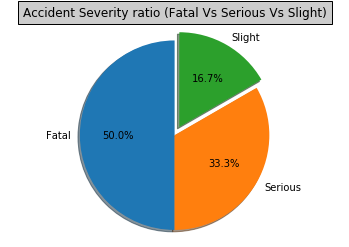

In [22]:
# Pie chart - Accident severity from reported accidents
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
# labels and explode for the plots 
labels = ['Fatal', 'Serious', 'Slight']
explode = (0, 0, 0.1)
# figure and axis for the plot
fig, ax = plt.subplots()
ax.pie(df['accident_severity'].unique(), 
       explode=explode, 
       labels=labels, 
       autopct='%1.1f%%', 
       shadow=True, 
       startangle=90)

# axis - equals
ax.axis('equal')
plt.title("Accident Severity ratio (Fatal Vs Serious Vs Slight)", 
          bbox={'facecolor':'0.8', 'pad':5})

plt.show()

<Figure size 1080x504 with 0 Axes>

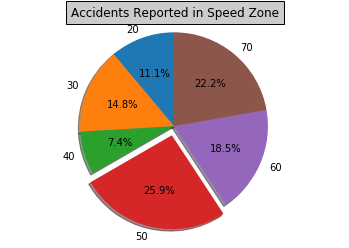

In [23]:
# Pie chart - Accident reported in Speed Zone
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7))
# labels and explode for the plot
labels = ['20', '30', '40' , '50', '60', '70']
explode = (0, 0, 0, 0.1, 0, 0)
# fig and axis 
fig, ax = plt.subplots()
ax.pie(df['speed_limit'].unique(),
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)

# axis - equal
ax.axis('equal')
plt.title('Accidents Reported in Speed Zone',
          bbox={'facecolor':'0.8', 'pad': 5})
plt.show()

(0.0, 27930.0)

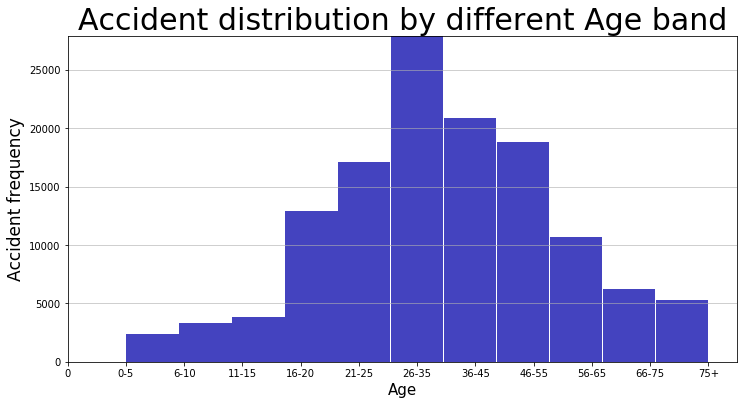

In [24]:
# Histogram - Accident distribution by age
import matplotlib.pyplot as plt
import numpy as np
# define the age bands for label the graph
age_band = ['0','0-5','6-10','11-15','16-20','21-25','26-35', '36-45', '46-55','56-65','66-75','75+']
bins = 11
plt.figure(figsize=(12,6))

# plot historgram
n, bins, patches = plt.hist(x = df['age_band_of_casualty'],
                            bins = bins, color = '#0504aa', alpha = 00.75, rwidth = 0.99)

# title
plt.title("Accident distribution by different Age band", fontsize = 30)
plt.grid(axis='y', alpha=0.75)
y_pos = np.arange(len(age_band))
plt.xticks(y_pos , age_band)
plt.ylabel('Accident frequency' , fontsize = 17)
plt.xlabel('Age', fontsize=15)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

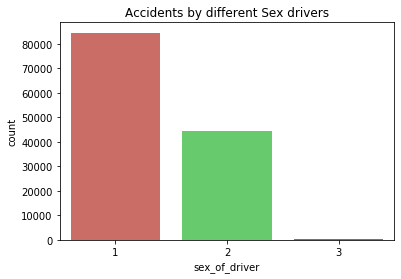

In [25]:
# Bar - Accidents by different Sex drivers
import seaborn as sns
import matplotlib.pyplot as plt
# define labels
label = ['Male', 'Female', 'Unknown'] # need to add the labels
# seaborn countplot
chart = sns.countplot(x='sex_of_driver',
                      data=df, 
                      palette='hls').set_title("Accidents by different Sex drivers")
# # adding label into countplot using matplotlib
# chart.set(labels= label)
# plt.show()

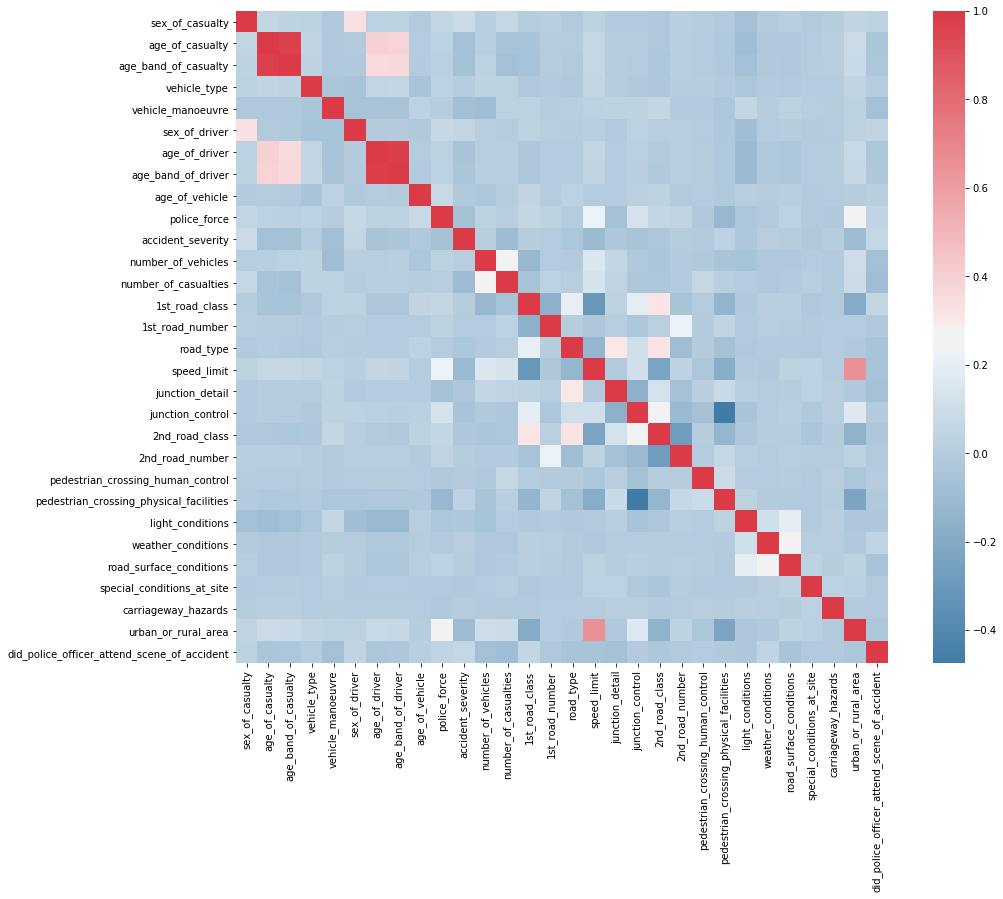

In [27]:
# Heat map - Correlation matrix
fig, ax = plt.subplots(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax)

# Complete dataset

In [16]:
# Complete data into csv file for classification models
new_file = df.to_csv('cleanned_uk_road_accident.csv', index=False)

# Loading data (cleanned data)

In [28]:
# required module
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data function
def load_data(filename):
    # creating empty list
    dataset = list()
    # try to read file
    try:
        with open(filename, 'r') as infile:
            # reader from csv
            file_reader = csv.reader(infile)
            # skipping header
            header = next(file_reader, None)
            # for each row
            for row in file_reader:
                if not row:
                    continue
                # append the data
                dataset.append(row)
                
    except FileNotFoundError:
        print("Invalid file path!")
        
    return dataset

# striping leading character 
def column_string_to_float(data, column):
    # for each values in list
    for row in data:
        row[column] = float(row[column].strip())
        


# calling the function - load data
data = load_data('cleanned_uk_road_accident.csv')
print("Peek at data:\n", data[:10])

print() # blank line

# calling the function - column_string_to_float
for i in range(len(data[0])):
    column_string_to_float(data, i)
# display the data
print("Data after converting into float and removing leading characters:\n", data[:10])

Peek at data:
 [['2', '36', '7', '9', '18', '2', '36', '7', '1', '1', '1', '1', '3', '207', '6', '30', '9', '4', '6', '0', '0', '0', '4', '1', '1', '0', '0', '1', '1', '3'], ['1', '24', '5', '9', '18', '1', '24', '5', '5', '1', '1', '1', '3', '4020', '1', '30', '1', '4', '3', '4020', '0', '0', '4', '1', '1', '0', '0', '1', '1', '3'], ['2', '59', '9', '11', '18', '1', '55', '8', '7', '1', '1', '1', '3', '217', '6', '30', '3', '2', '3', '217', '0', '0', '1', '1', '1', '0', '0', '1', '1', '3'], ['2', '30', '6', '9', '18', '2', '30', '6', '10', '1', '2', '1', '3', '23', '6', '30', '3', '4', '6', '0', '0', '8', '1', '1', '1', '0', '0', '1', '1', '3'], ['2', '30', '6', '9', '18', '1', '27', '6', '5', '1', '2', '1', '3', '23', '6', '30', '3', '4', '6', '0', '0', '8', '1', '1', '1', '0', '0', '1', '1', '3'], ['2', '30', '6', '9', '18', '2', '30', '6', '15', '1', '2', '1', '3', '504', '6', '30', '3', '4', '6', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '3'], ['1', '36', '7', '19', '3', '

# Create Training & Validation sets
1. Train and Validation (test) data
2. Split between trian and valisdation set

In [29]:
# train and test data
# can also use "itemgetter()", but using simple list comprehension
print("Train data:")
train_data = [i[:-1] for i in data]
# train_data= train_data.astype(str)
print(train_data[:10])
print()
# converting into numpy arrays
train_data = np.array(train_data)
print(train_data[:10])
print()

print("Test data:")
test_data = [i[-1] for i in data]
print(test_data[:10])


from sklearn.model_selection import train_test_split
# split data into train and test set using 70% for target and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(train_data,
                                                    test_data, 
                                                    test_size=0.3,
                                                    random_state=0)

print() # blank line
# display data
print(x_train.shape) # shape of array
print(x_test.shape) # shape of array
print(len(y_train)) # length of list
print(len(y_test)) # length of list

Train data:
[[2.0, 36.0, 7.0, 9.0, 18.0, 2.0, 36.0, 7.0, 1.0, 1.0, 1.0, 1.0, 3.0, 207.0, 6.0, 30.0, 9.0, 4.0, 6.0, 0.0, 0.0, 0.0, 4.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], [1.0, 24.0, 5.0, 9.0, 18.0, 1.0, 24.0, 5.0, 5.0, 1.0, 1.0, 1.0, 3.0, 4020.0, 1.0, 30.0, 1.0, 4.0, 3.0, 4020.0, 0.0, 0.0, 4.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], [2.0, 59.0, 9.0, 11.0, 18.0, 1.0, 55.0, 8.0, 7.0, 1.0, 1.0, 1.0, 3.0, 217.0, 6.0, 30.0, 3.0, 2.0, 3.0, 217.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], [2.0, 30.0, 6.0, 9.0, 18.0, 2.0, 30.0, 6.0, 10.0, 1.0, 2.0, 1.0, 3.0, 23.0, 6.0, 30.0, 3.0, 4.0, 6.0, 0.0, 0.0, 8.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], [2.0, 30.0, 6.0, 9.0, 18.0, 1.0, 27.0, 6.0, 5.0, 1.0, 2.0, 1.0, 3.0, 23.0, 6.0, 30.0, 3.0, 4.0, 6.0, 0.0, 0.0, 8.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], [2.0, 30.0, 6.0, 9.0, 18.0, 2.0, 30.0, 6.0, 15.0, 1.0, 2.0, 1.0, 3.0, 504.0, 6.0, 30.0, 3.0, 4.0, 6.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0], [1.0, 36.0, 7.0, 19.0, 3.0, 1.0, 29.0, 6.0, 3.0, 1.0, 3.0, 1.0

# Test Harness
I will use stratified 10-fold cross validation to estimate model accuracy. This will split my dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Note: Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

I am using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

# Builds Models
1. Logistic Regression (LR)
2. K-Nearest Neighbors (KNN).
3. Classification and Regression Trees (CART).
4. Gaussian Naive Bayes (NB).
5. Support Vector Machines (SVM).
6. Ensemble - Random Forest, Bagging Classification
7. Neural Network - ANN

This is a good mixture of Linear (Logistic Regression) and Non-Linear (KNN, CART, NB, and SVM).

In [30]:
# import required modules
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [31]:
# create an empty list for all the models
models = list()
# define models and append into an empty lists
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr'))) # for multiclass - OneVsRestClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
# models.append(('SVM', SVC(gamma='auto')))

# evaluate each model
# create an empty list for results and model's names
result = list()
names = list()
# iterate over each models - also using cross validation
for name, model in models:
    k_fold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cross_validation_results = cross_val_score(model, x_train, y_train, cv = k_fold, scoring = 'accuracy')
    result.append(cross_validation_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cross_validation_results.mean(), cross_validation_results.std()))

Logistic Regression: 0.848817 (0.000286)
KNN: 0.845084 (0.001485)
CART: 0.820636 (0.003382)
Naive Bayes: 0.778288 (0.005239)
Random Forest: 0.883004 (0.001836)


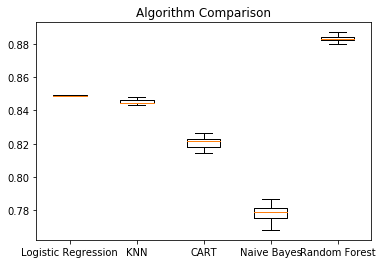

In [32]:
# Box plot to compare the algorithms
plt.boxplot(result, labels=names)
plt.title("Algorithm Comparison")
plt.show()

# Make Predictions
Fitting model on the entire training dataset and making prediction on the validation dataset after choosing the best model. This section contains the predictions by:
1. entire validation set
2. single data Instances (for further study)

In [33]:
# So the best model is Random Forest Classifier so I will predicting using Random Forest classification
model = RandomForestClassifier().fit(x_train, y_train)
predictions = model.predict(x_test)
print(predictions[:10])

[3. 3. 3. 3. 3. 3. 3. 3. 3. 1.]


# Evaluate Predictions
I can evaluate the predictions by comparing them to the expected results in the validation set, then calcuating the classification accuracy as well as a confusion matrix.

Accuracy Score:  0.8845202514686179

Confusion Matrix:
  [[   99    15   210]
 [    0  1463  4102]
 [    0   155 32768]]


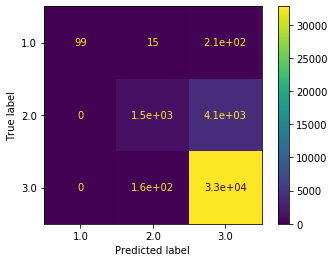


Classification report:
                precision    recall  f1-score   support

         1.0       1.00      0.31      0.47       324
         2.0       0.90      0.26      0.41      5565
         3.0       0.88      1.00      0.94     32923

    accuracy                           0.88     38812
   macro avg       0.93      0.52      0.60     38812
weighted avg       0.89      0.88      0.86     38812



In [35]:
print("Accuracy Score: ", accuracy_score(y_test, predictions))
print() # blank line

print("Confusion Matrix:\n ", confusion_matrix(y_test, predictions))
# plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)
plt.show()

print() # blank line
print("Classification report:\n ", classification_report(y_test, predictions))

# See if the statistic comparison of relativity between features and automatic feature selection/extraction helps to increase the model performance
Feature Selection is a process where we automatically select those features in our data that contribute most to the prediction variable or output in which we are interested. Having irrelevant features in our data can decrease the accuracy of many models, expecially linear algorithms like Linear and logistic regression. Below are the features selection's approaches that we will br focusing on. 
1. Chi-Squared Statistics
2. Mutual Information Statistics
3. Recursive Feature Elimination (RFE) & Automatically Feature Selection

# Chi-Squared feature selection
Chi-Squared test for independence between categorical variables and it assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable.

----- Chi-Squared Feature Selection -------
Feature 0: 108.908494
Feature 1: 3985.591309
Feature 2: 237.181252
Feature 3: 124.015516
Feature 4: 1461.472689
Feature 5: 48.575443
Feature 6: 1195.270606
Feature 7: 65.942263
Feature 8: 57.743647
Feature 9: 5711.136583
Feature 10: 21.032180
Feature 11: 1122.546647
Feature 12: 20.677878
Feature 13: 2011.546714
Feature 14: 73.079628
Feature 15: 4095.464597
Feature 16: 110.564502
Feature 17: 33.971927
Feature 18: 42.392026
Feature 19: 34755.369141
Feature 20: 29.416772
Feature 21: 405.167192
Feature 22: 103.295817
Feature 23: 30.375789
Feature 24: 0.287367
Feature 25: 164.103113
Feature 26: 15.427636
Feature 27: 145.376549
Feature 28: 46.362240



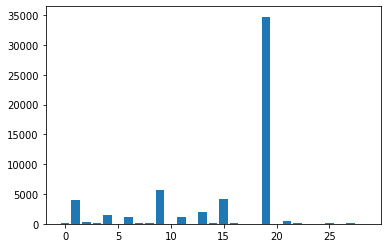

In [36]:
from sklearn.feature_selection import SelectKBest, chi2
# Chi-Squared Feature Selection
print("----- Chi-Squared Feature Selection -------")
def select_features_chi(x_train, y_train, x_test):
    feature_selection = SelectKBest(score_func=chi2, k='all') ## selecting top 10
    feature_selection.fit(x_train, y_train)
    X_train_fs = feature_selection.transform(x_train)
    X_test_fs = feature_selection.transform(x_test)
    return X_train_fs, X_test_fs, feature_selection

# calling select_features_chi() function
X_train_fs, X_test_fs, feature_selection = select_features_chi(x_train, y_train, x_test)
# what are the scores for the feature
for i in range(len(feature_selection.scores_)):
    print("Feature %d: %f" % (i, feature_selection.scores_[i]))

print() # blank line
plt.bar([i for i in range(len(feature_selection.scores_))], feature_selection.scores_)
plt.show()

# Mutual Information Selection Feature Selection
Used for feature selection, by evaluating the gain of each variable in the context of the target variable.

------ Mutual Information Feature Selection --------- 
Feature 0: 0.009580
Feature 1: 0.004324
Feature 2: 0.007757
Feature 3: 0.019258
Feature 4: 0.012654
Feature 5: 0.011049
Feature 6: 0.003802
Feature 7: 0.003981
Feature 8: 0.002618
Feature 9: 0.009692
Feature 10: 0.014339
Feature 11: 0.010741
Feature 12: 0.005901
Feature 13: 0.038522
Feature 14: 0.011637
Feature 15: 0.010798
Feature 16: 0.006664
Feature 17: 0.012694
Feature 18: 0.010376
Feature 19: 0.022135
Feature 20: 0.000000
Feature 21: 0.001497
Feature 22: 0.007804
Feature 23: 0.007637
Feature 24: 0.008138
Feature 25: 0.000000
Feature 26: 0.001662
Feature 27: 0.014442
Feature 28: 0.012072



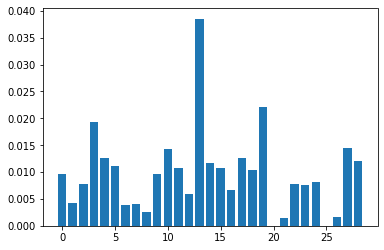

In [37]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Mutual Information Feature Selection
print("------ Mutual Information Feature Selection --------- ")
# define the mutual inforamtion feature selection function
def feature_selection_mutualinfo(x_train, y_train, x_test):
    feature_selection_mi = SelectKBest(score_func=mutual_info_classif, k='all') ## selecting top 10
    feature_selection_mi.fit(x_train, y_train)
    X_train_fs_mi = feature_selection_mi.transform(x_train)
    X_test_fs_mi = feature_selection_mi.transform(x_test)
    return X_train_fs_mi, X_test_fs_mi, feature_selection_mi

# calling select_features_chi() function
X_train_fs_mi, X_test_fs_mi, feature_selection_mi = feature_selection_mutualinfo(x_train, y_train, x_test)
# what are the scores for the feature
for i in range(len(feature_selection_mi.scores_)):
    print("Feature %d: %f" % (i, feature_selection_mi.scores_[i]))


print() # blank line

# plot the scores
plt.bar([i for i in range(len(feature_selection_mi.scores_))], feature_selection_mi.scores_)
plt.show()

# Fit models - Random forest Classifier (most dominent one)
- with all the features
- with top 10 features (Chi-Squared and Mutual Information feature selection)

In [38]:
# running model without feature selection
model = RandomForestClassifier()
model.fit(x_train, y_train)
# evaluate the model
yhat = model.predict(x_test) # y_prediction
# evaluate prediction 
accuracy = accuracy_score(y_test, yhat)
# display accuracy
print("Accuracy using all features: %.2f" % (accuracy*100))

# fit modoel - using chi2 feature selection - using top 10 features
def chi_select_features_top_10(x_train, y_train, x_test):
    chi_fs = SelectKBest(score_func=chi2, k=15)
    chi_fs.fit(x_train, y_train)
    x_chi_train = chi_fs.transform(x_train)
    x_chi_test = chi_fs.transform(x_test)
    return x_chi_train, x_chi_test

# feature selection - Chi-Squared top 10 feature
x_chi_train, x_chi_test = chi_select_features_top_10(x_train, y_train, x_test)
# print("Selected columns:\n", x_chi_train[0:5])
# fit model
model = RandomForestClassifier()
model.fit(x_chi_train, y_train)
# evaluate the model
yhat = model.predict(x_chi_test) # y_prediction
# evaluate prediction 
accuracy = accuracy_score(y_test, yhat)
# display accuracy
print("Accuracy after using Chi-Sqaured feature's selection of Top15: %.2f" % (accuracy*100))


# fit modoel - using chi2 feature selection - using top 10 features
def mis_select_features_top_10(x_train, y_train, x_test):
    mis_fs = SelectKBest(score_func=mutual_info_classif, k=15)
    mis_fs.fit(x_train, y_train)
    x_mis_train = mis_fs.transform(x_train)
    x_mis_test = mis_fs.transform(x_test)
    return x_mis_train, x_mis_test

# feature selection - Chi-Squared top 10 feature
x_mis_train, x_mis_test = mis_select_features_top_10(x_train, y_train, x_test)
# print("Selected columns:\n", x_mis_train[0:5])
# fit modoel - using mutual information gain
model = RandomForestClassifier()
model.fit(x_mis_train, y_train)
# evaluate the model
yhat = model.predict(x_mis_test) # y_prediction
# evaluate prediction 
accuracy = accuracy_score(y_test, yhat)
# display accuracy
print("Accuracy after using Mutual Information statistic feature's selection Top15: %.2f" % (accuracy*100))

Accuracy using all features: 88.44
Accuracy after using Chi-Sqaured feature's selection of Top15: 87.91
Accuracy after using Mutual Information statistic feature's selection Top15: 88.99


# RFE feature selection and Automatic Feature selection